<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/KNN/30_KNNClassifierandRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/12-health_risk_classification.csv')

In [4]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

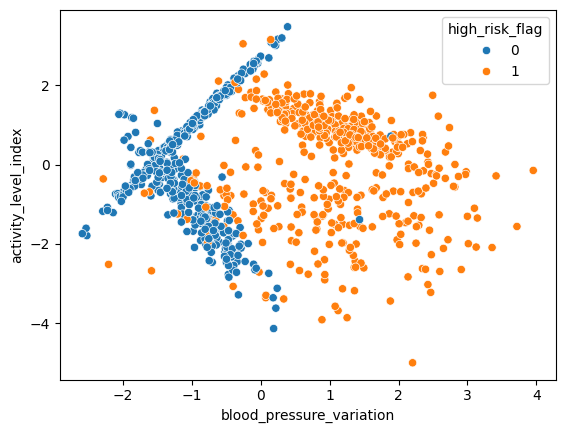

In [8]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["activity_level_index"],hue=df["high_risk_flag"])
plt.show()

In [12]:
df["high_risk_flag"].value_counts()

,count
high_risk_flag,
0,502
1,498


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop("high_risk_flag",axis=1)
y = df["high_risk_flag"]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

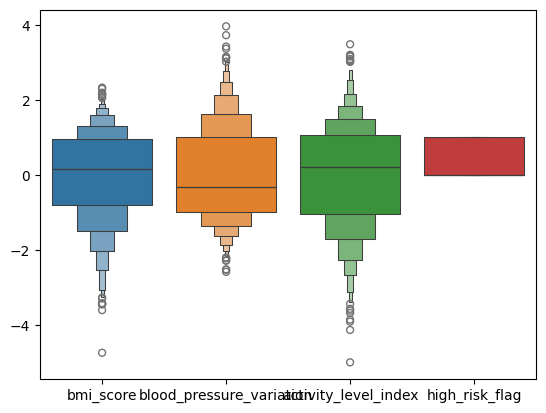

In [16]:
sns.boxenplot(df)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler # bu data scale edilmesine gerek yok temiz bir data medyanları felan her bir featurein birbirine yakın ama yinede yapıyoruz.

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm="auto",weights ="uniform")

In [26]:
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(X_test_scaled)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       134
           1       0.92      0.98      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[124  10]
 [  2 114]]


In [31]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",weights ="uniform")
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [32]:
y_pred = classifier.predict(X_test_scaled)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       134
           1       0.92      0.98      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[124  10]
 [  2 114]]


In [33]:
classifier = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights ="uniform")
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [34]:
y_pred = classifier.predict(X_test_scaled)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       134
           1       0.93      0.99      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[125   9]
 [  1 115]]


In [35]:
df_reg = pd.read_csv("/content/drive/MyDrive/Dataset/12-house_energy_regression.csv")

In [36]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [37]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [41]:
df_reg["daily_energy_consumption_kwh"].isnull().sum()

np.int64(0)

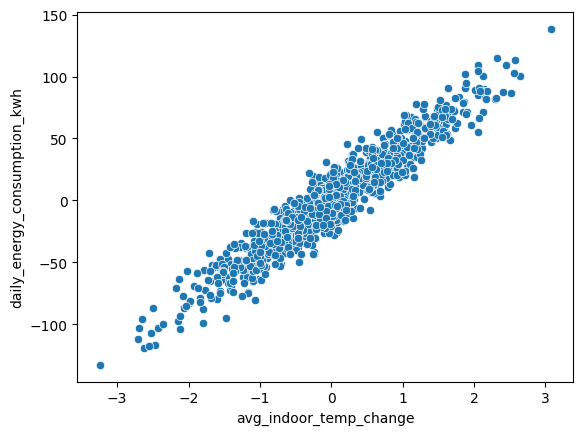

In [44]:
sns.scatterplot(x=df_reg["avg_indoor_temp_change"],y=df_reg["daily_energy_consumption_kwh"])
plt.show()

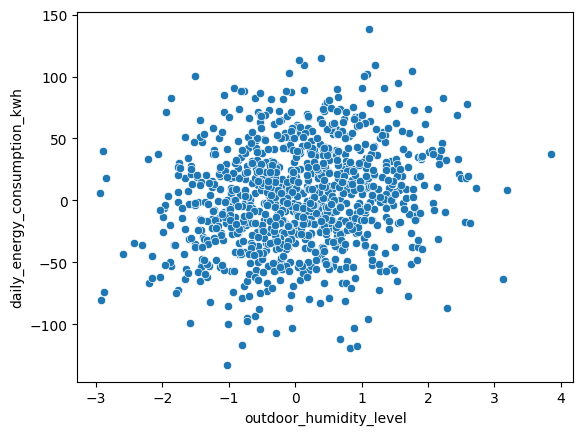

In [45]:
sns.scatterplot(x=df_reg["outdoor_humidity_level"],y=df_reg["daily_energy_consumption_kwh"])
plt.show()

In [46]:
df_reg.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
X = df_reg.drop("daily_energy_consumption_kwh",axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
regressor = KNeighborsRegressor(n_neighbors=5,algorithm="auto")

In [54]:
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [55]:
y_pred = regressor.predict(X_test_scaled)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [58]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  9.42143518926242
mse :  140.40201685069158
r2_score :  0.9152685146562609


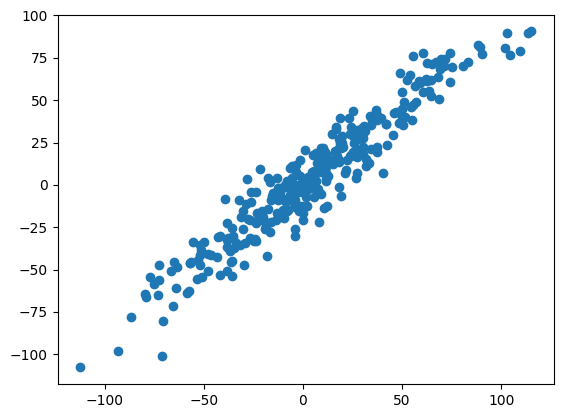

In [59]:
plt.scatter(y_test,y_pred)
plt.show()

mae :  9.331428506491209
mse :  138.3840541750219
r2_score :  0.9164863388635838


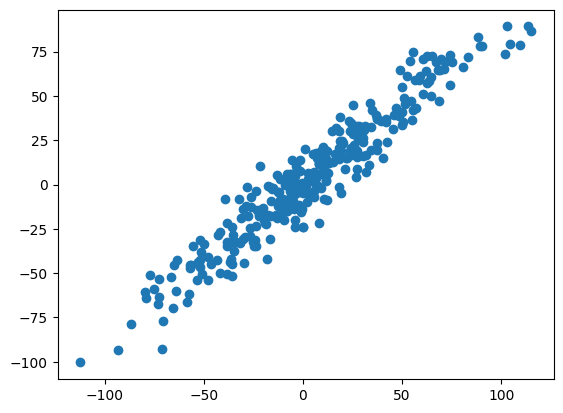

In [60]:
regressor = KNeighborsRegressor(n_neighbors=7,algorithm="auto")
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)
plt.scatter(y_test,y_pred)
plt.show()